# Бинарная классификация с применением нейронной сети с одним скрытым слоем

В данной лабораторной работе рассмотрим процесс создание нейронной сети с одним скрытым слоем. Сравните данную модель с уже изученной Вами ранее- логистической регрессией. 

**В результате выполнения данной лабораторной Вы:**
- Создадите нейронную сеть с одним скрытым слоем для бинарной классификации
- Используете нелинейную функцию активации нейронов, например тангенциальную 
- Рассчитаете ошибку при помощи перекресной энтропии
- Примените алгоритм обратного распространения ошибки


## 1 - Библиотеки ##

Вначале импортируем следующие необходимые для выполнения лабораторной работы библиотеки:
- [numpy](https://www.numpy.org/) - одна из основных библиотек для работы с данными при использовании языка Python.
- [sklearn](http://scikit-learn.org/stable/) предоставляет простые и эффективные модели для анализа данных
- [matplotlib](http://matplotlib.org) - это библиотека для создания графиков.
- Модуль testCases содержит набор тестовых примеров и позволяет оценить корректность реализованных Вами функций.
- Модуль planar_utils содержит множество функций используемых в данной лабораторной работе.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) # не меняйте это значение для автоматической проверки правильности выполнения

## 2 - Набор данных ##

Для начала загрузим данные, которые необходимо анализировать. Следующий код загружает набор данных "Полярная роза" (известная математическая кривая, похожая на цветок с лепестками). Загрузим координаты точек `X` и `Y`.

In [ ]:
X, Y = load_planar_dataset()

Визуализируем данные с помощью библиотеки matplotlib. Точки представляют собой "цветок" и имеют красные маркеры (y=0) и синие (y=1). Необходимо создать модель классификации точек по цвету.

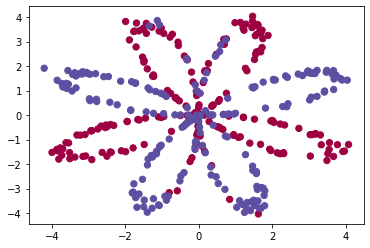

In [ ]:
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral)

 Имеем:
    - numpy-массив (матрица) X содержащая переменные (x1, x2)
    - numpy-массив (вектор) Y содержащий метку класса (красный:0, синий:1).


**Задание**: Каков размер вашей обучающей выборки? А также,какова форма numpy-массивов `X` и `Y`? 


YOUR ANSWER HERE

In [ ]:
# YOUR CODE HERE
shape_X = X.shape # значения x1 , x2
shape_Y = Y.shape # значние, котрое принмает y 0 или 1 
m = shape_X[1] # размер обучающей выборки

print ('Форма X: ' + str(shape_X))
print ('Форма Y: ' + str(shape_Y))
print ('m = ',m)

Форма X: (2, 400)
Форма Y: (1, 400)
m =  400


In [ ]:
assert shape_X == (2,400)
assert shape_Y == (1,400)
assert m == 400

In [ ]:
print(X[:,0], Y[:,0])
print(X[:,1], Y[:,1])
print(X[:,2], Y[:,2])
print(X[:,5], Y[:,5])
print(X[:,100], Y[:,100])
print(X[:,355], Y[:,355])
print(X[:,399], Y[:,399])

[1.20444229 3.57611415] [0]
[ 0.1587099 -1.4821709] [0]
[ 0.0952472  -1.27995533] [0]
[ 1.62065038 -4.035124  ] [0]
[-1.02715843 -0.0951627 ] [0]
[ 1.79730919 -3.09272026] [1]
[0.73078083 3.06832921] [1]


## 3 - Логистическая регрессия

Перед созданием нейронной сети рассмотрим применимость логистической регрессии в данном случае. Для этого Вы можете использовать встроенные функции библиотеки sklearn. Запустите следующий код для обучения классификатора на основе логистической регрессии по представленным данным.

In [ ]:
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y[0].T);

Теперь вы можете визуализировать границу раздела классов для данной модели. Запустите код, предложенный ниже.

Точность логистической регрессии:  47.0 % (процент правильно классифицированных точек)


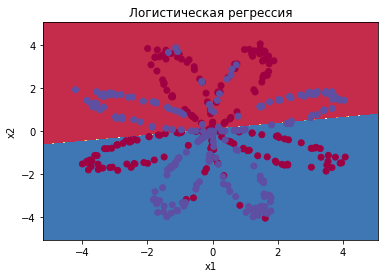

In [ ]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Логистическая регрессия")

LR_predictions = clf.predict(X.T)
print ('Точность логистической регрессии: ', float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100),
       '% (процент правильно классифицированных точек)')

**Задание**: Объясните низкий процент точности при применении логистической регреессии к данной задаче.

Набор данных нельзя линейно разделить, в связи с этим логестическая регрессия работает плохо

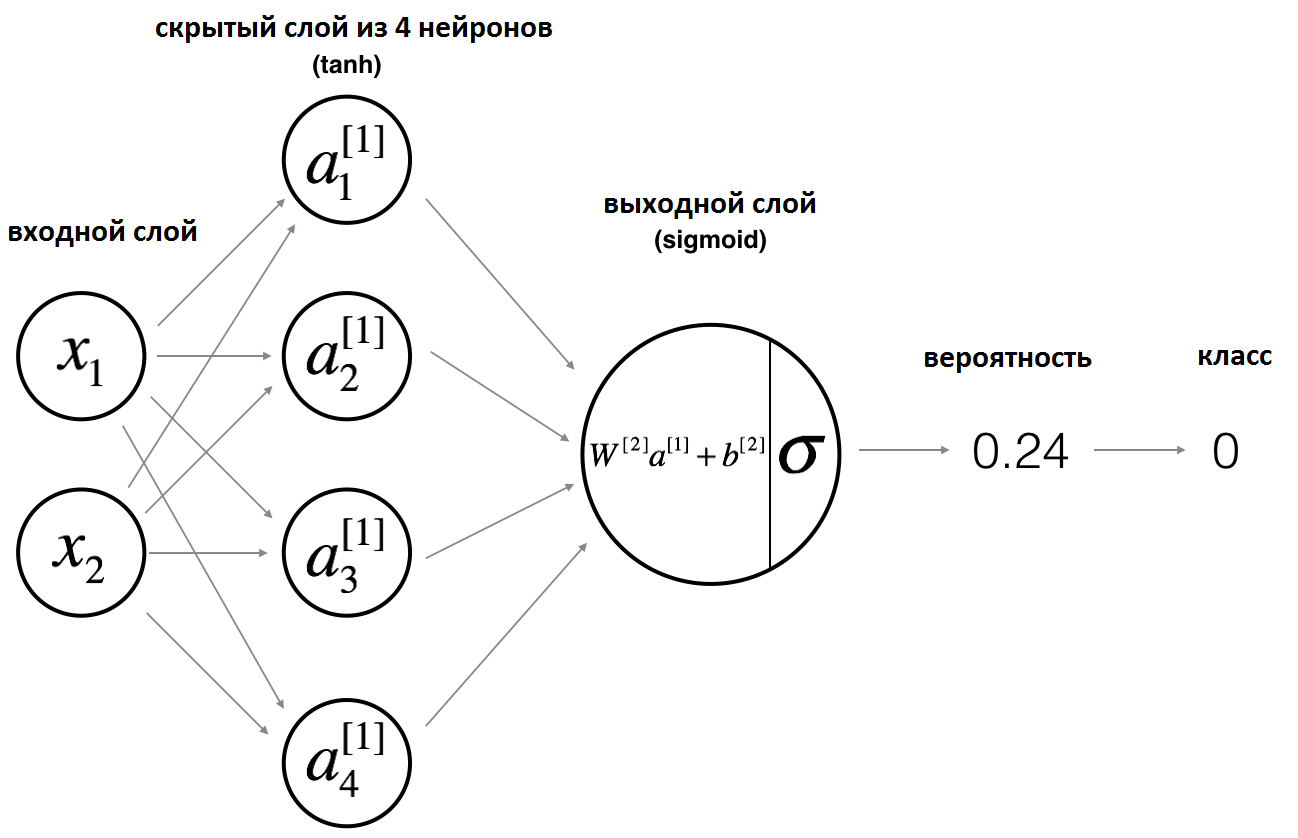

## 4 - Нейронная сеть

Алгоритм логистичской регрессии показал слабую классификацию на наборе данных "Полярная роза". Далее Вам предстоить использовать нейронную сеть с одним скрытым слоем для улучшения качества класссификации.

**Архитектура используемой сети с одним скрытым слоем**:
<img src="classificati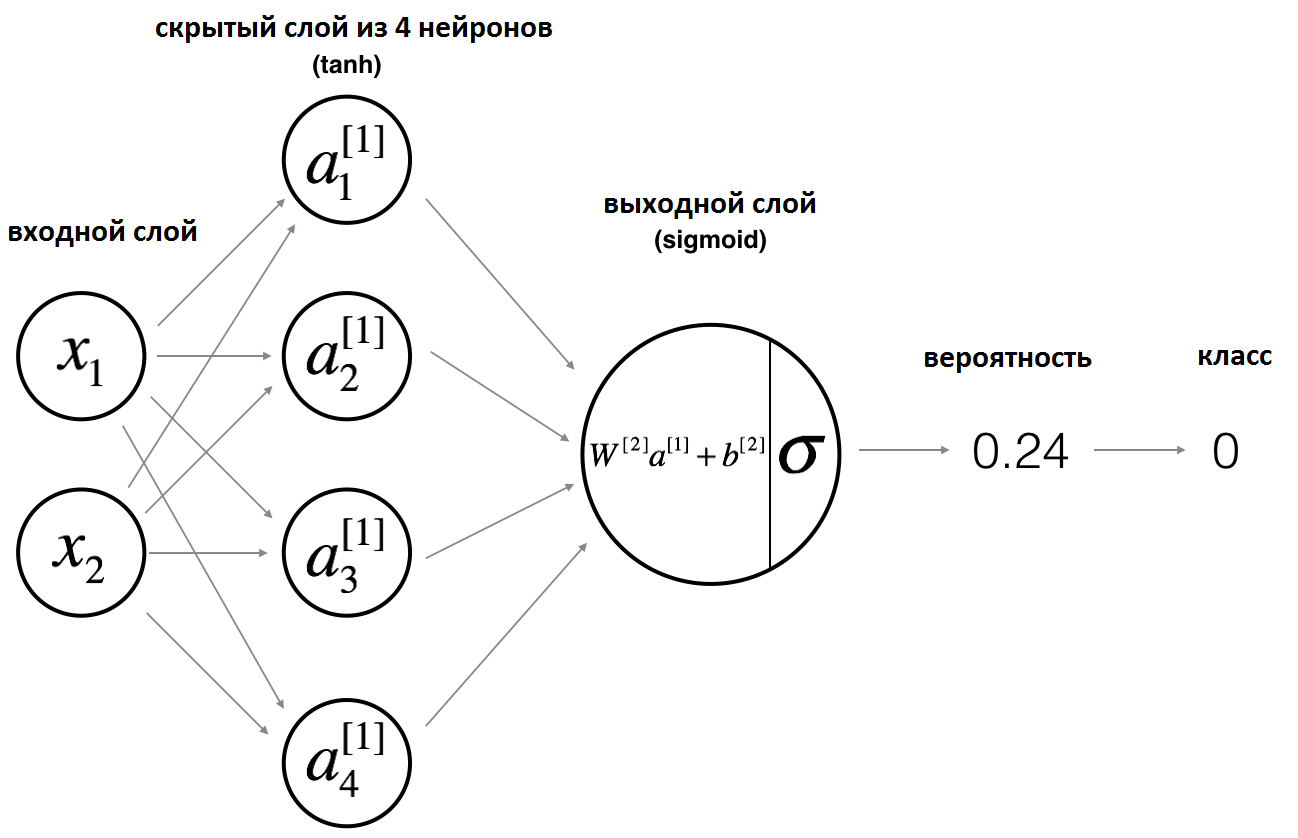on.png" style="width:600px;">

**Алгоритм обучения нейронной сети**:

Для экземпляра данных $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{, если } a^{[2](i)} > 0.5 \\ 0 & \mbox{, иначе } \end{cases}\tag{5}$$

Используя все обучающие примеры, в качестве функции ошибки ИНС будем оценивать функционал стоимости $J$ как: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**Важно**: Используем алогоритм построения искусственной нейронной сети:
   1. Определить архитектуру нейросетевой модели ( количество входов,  число скрытых слоев, размеры слоев и другие). 
   2. Инициализировать параметры модели (веса, смещения, граденты, оценку функционала и другие)
   3. На каждой итерации обучения:
       - Прямое распространение сигнала по сети (предъявление очередного
       набора из обучающей выборки на вход нейронной сети)
       - Вычисление выходного сигнала сети и функции ошибки
       - Обратное распространение ошибки и определение величин ошибок нейронов
       - Обновление весов сети (методом градиентного спуска)

В начале следует реализовать основные функции алгоритма, а затем использовать их в правильном порядке в главной функции модели `nn_model()`. После реализации `nn_model()` и обучения нейронной сети Вы получите классификатор и сможете его применить на "новых" для сети данных (которых не было в обучающем наборе).

### 4.1 - Определение архитектуры нейронной сети ####

**Задание**: Определите три переменных в соотвествии с изображением:
    - n_x: размер входного слоя
    - n_h: размер скрытого слоя
    - n_y: размер выходного слоя

In [ ]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

In [ ]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("Размер входного слоя: n_x = " + str(n_x))
print("Размер скрытого слоя: n_h = " + str(n_h))
print("Размер выходного слоя: n_y = " + str(n_y))

assert n_x == 2
assert n_h == 4
assert n_y == 1

Размер входного слоя: n_x = 2
Размер скрытого слоя: n_h = 4
Размер выходного слоя: n_y = 1


### 4.2 - Инициализация параметров модели ####

**Задание**: Реализуйте функцию `initialize_parameters()`, которая инициализирует веса W нейронов вещественными случайными числами и смещения b нулями.

In [ ]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2) # не меняйте значение для автопроверки
    
    W1 = np.random.randn(n_h,n_x)
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)
    b2 = np.zeros((n_y,1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [ ]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.41675785 -0.05626683]
 [-2.1361961   1.64027081]
 [-1.79343559 -0.84174737]
 [ 0.50288142 -1.24528809]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-1.05795222 -0.90900761  0.55145404  2.29220801]]
b2 = [[0.]]


### 4.3 - Цикл обучения ####

**Задание**: Реализуйте функцию прямого распространения сигнала по сети `forward_propagation()`.

**Указания**:
- Следуйте математическому описанию работы нейрона.
- Используйте функцию `sigmoid()` из пакета planar_utils и тангенциальную функцию np.tanh().
- Реализуйте прямое распространение обучающей выборки по сети, вычислив векторы выходных значений и активаций нейронов $Z^{[1]}, A^{[1]}, Z^{[2]}$ и $A^{[2]}$.
- Значения для вышисления ошибок при обратном распространении ошибок сохраняются в "`cache`".

In [ ]:
def forward_propagation(X, parameters):
    #получаем значения переменных 
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    #считаем
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [ ]:
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)

print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

assert(A2.shape == (1, X_assess.shape[1]))

0.26281864019752443 0.09199904522700113 -1.3076660128732143 0.21287768171914198


После вычисления вектора $A^{[2]}$ выходных значений нейрона выходного слоя для каждого экземпляра обучающей выборки $a^{[2](i)}$, необходимо вычислить функционал стоимости (ошибки) на основе перекрестной энтропии:

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

**Задание**: Реализуйте функцию `compute_cost()` для расчета функционала ошибки $J$ с помощью.

In [ ]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[1]

    # YOUR CODE HERE
    cost = - np.sum(np.multiply(np.log(A2),Y) + np.multiply(np.log(1 - A2),1 - Y)) * (1 / m) 
    
    return cost

In [ ]:
A2, Y_assess, parameters = compute_cost_test_case()

cost = compute_cost(A2, Y_assess, parameters)
print("cost = " + str(cost))

assert(isinstance(cost, float))

cost = 0.6930587610394646


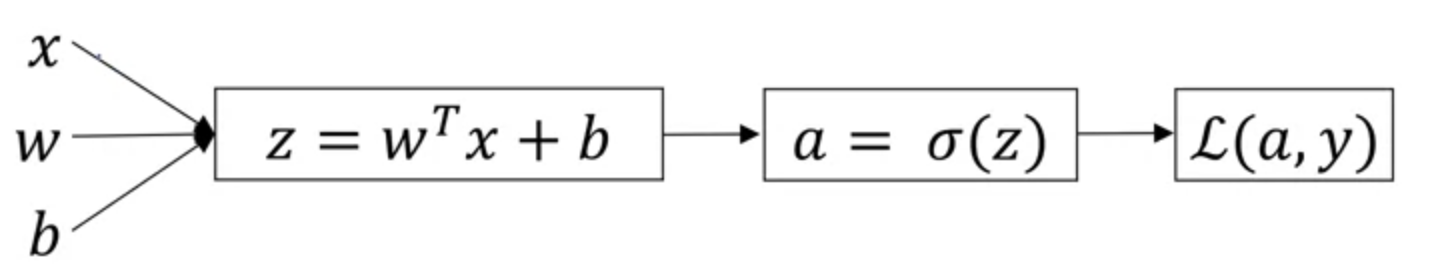

**Подробнее рассмотрим процесс вычисления градиента для логистической регрессии для одного примера:**


<img src="intuition.png" style="width:600px;">

**Процесс передачи данных можно представить в виде 3х основных этапов:**
1. Результат $z$ - линейной комбинации входных призаков $x$ с весами $w$ и смещением $b$;
2. Расчет $a$ - сигмоидальной функции активации $\sigma$;
3. Оценка фукции ошибки $\mathcal{L}$.

$$ \mathcal{L} = -y^{(i)}\log(a^{(i)})-(1-y^{(i)})\log(1-a^{(i)}).$$

**Расчет градиента происходит в обратном направлении:**


1. Оценка производной функции ошибки $\mathcal{L}$ по выходу $a$:

$$ \frac{\partial \mathcal{L}}{\partial a} = -\frac{y}{a}+\frac{1-y}{1-a}.$$


2. Оценка производной функции ошибки $\mathcal{L}$ по $z$ по правилу нахождения производной сложной функции (правило цепочки):

$$ \frac{\partial \mathcal{L}}{\partial z} = \frac{\partial \mathcal{L}}{\partial a}\frac{\partial a}{\partial z} = {(-\frac{y}{a}+\frac{1-y}{1-a}})a(1-a)=(a-y)$$


3. Оценка производной функции ошибки $\mathcal{L}$ по весам $w$ и смещению $b$:

$$ \frac{\partial \mathcal{L}}{\partial w} = \frac{\partial \mathcal{L}}{\partial a}\frac{\partial a}{\partial z} \frac{\partial z}{\partial w}= (a-y)x$$

$$ \frac{\partial \mathcal{L}}{\partial b} = \frac{\partial \mathcal{L}}{\partial a}\frac{\partial a}{\partial z} \frac{\partial z}{\partial b}= (a-y).$$

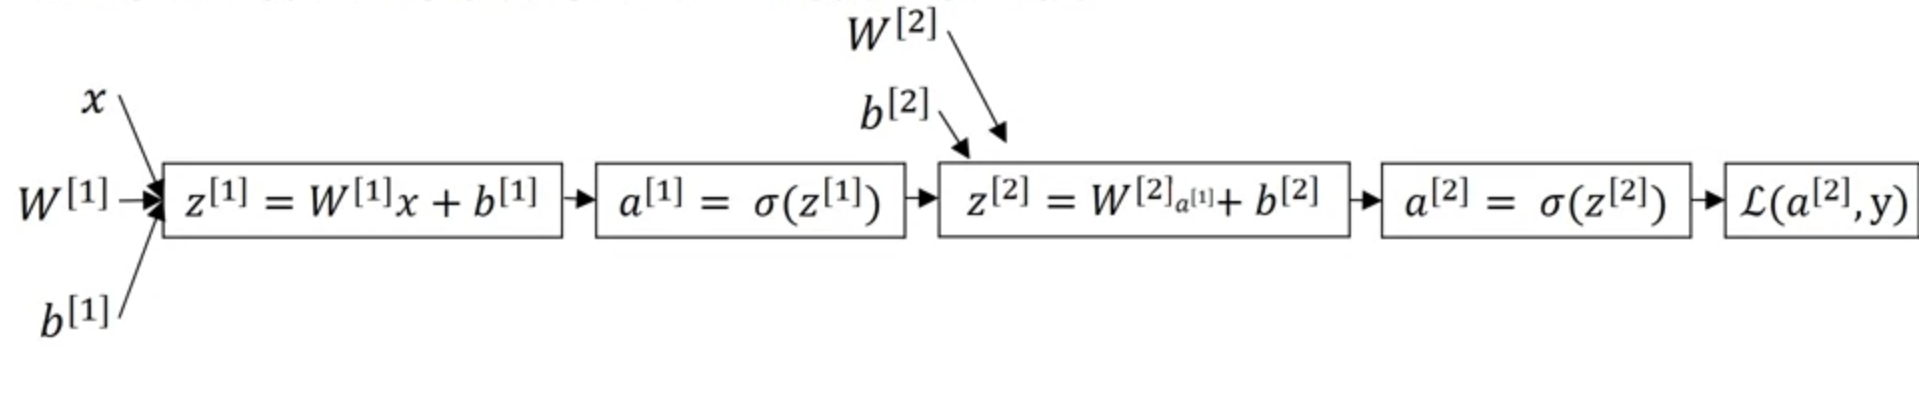

**Подробнее рассмотрим процесс вычисления градиента для нейронной сети с одним скрытым слоем:**

<img src="images/intuition2.png" style="width:1200px;">


1. Оценка производной функции ошибки $\mathcal{L}$ по $z^{[2]}$ по правилу нахождения производной сложной функции (правило цепочки):

$$ dz^{[2]}=\frac{\partial \mathcal{L}}{\partial z^{[2]}} = (a^{[2]}-y)$$


2. Оценка производной функции ошибки $\mathcal{L}$ по весам $w^{[2]}$ и смещению $b^{[2]}$:

$$ \frac{\partial \mathcal{L}}{\partial w^{[2]}} = \frac{\partial \mathcal{L}}{\partial a^{[2]}}\frac{\partial a^{[2]}}{\partial z^{[2]}} \frac{\partial z^{[2]}}{\partial w^{[2]}}= dz^{[2]}a^{[1]}$$

$$ \frac{\partial \mathcal{L}}{\partial b^{[2]}} = \frac{\partial \mathcal{L}}{\partial a^{[2]}}\frac{\partial a^{[2]}}{\partial z^{[2]}} \frac{\partial z^{[2]}}{\partial b^{[2]}}= dz^{[2]}.$$

3. Оценка производной функции ошибки $\mathcal{L}$ по $a^{[1]}$:

$$ da^{[1]}=\frac{\partial \mathcal{L}}{\partial a^{[1]}} = W^{[2]T} dz^{[2]}$$


4. Оценка производной функции ошибки $\mathcal{L}$ по $z^{[1]}$:

$$ dz^{[1]}=\frac{\partial \mathcal{L}}{\partial z^{[1]}} =\frac{\partial \mathcal{L}}{\partial a^{[1]}}\frac{\partial{a^{[1]}}}{\partial z^{[1]}}= W^{[2]T}{dz^{[2]}}*g^{[1]'}(z^{[1]}),$$

где * означает поэлементное произведение.


5. Оценка производной функции ошибки $\mathcal{L}$ по весам $w^{[1]}$ и смещению $b^{[1]}$:

$$ \frac{\partial \mathcal{L}}{\partial w^{[1]}} = \frac{\partial \mathcal{L}}{\partial a^{[1]}}\frac{\partial a^{[1]}}{\partial z^{[1]}} \frac{\partial z^{[1]}}{\partial w^{[1]}}= dz^{[1]}x^{T}$$

$$ \frac{\partial \mathcal{L}}{\partial b^{[1]}} = \frac{\partial \mathcal{L}}{\partial a^{[1]}}\frac{\partial a^{[1]}}{\partial z^{[1]}} \frac{\partial z^{[1]}}{\partial b^{[1]}}= dz^{[1]}.$$

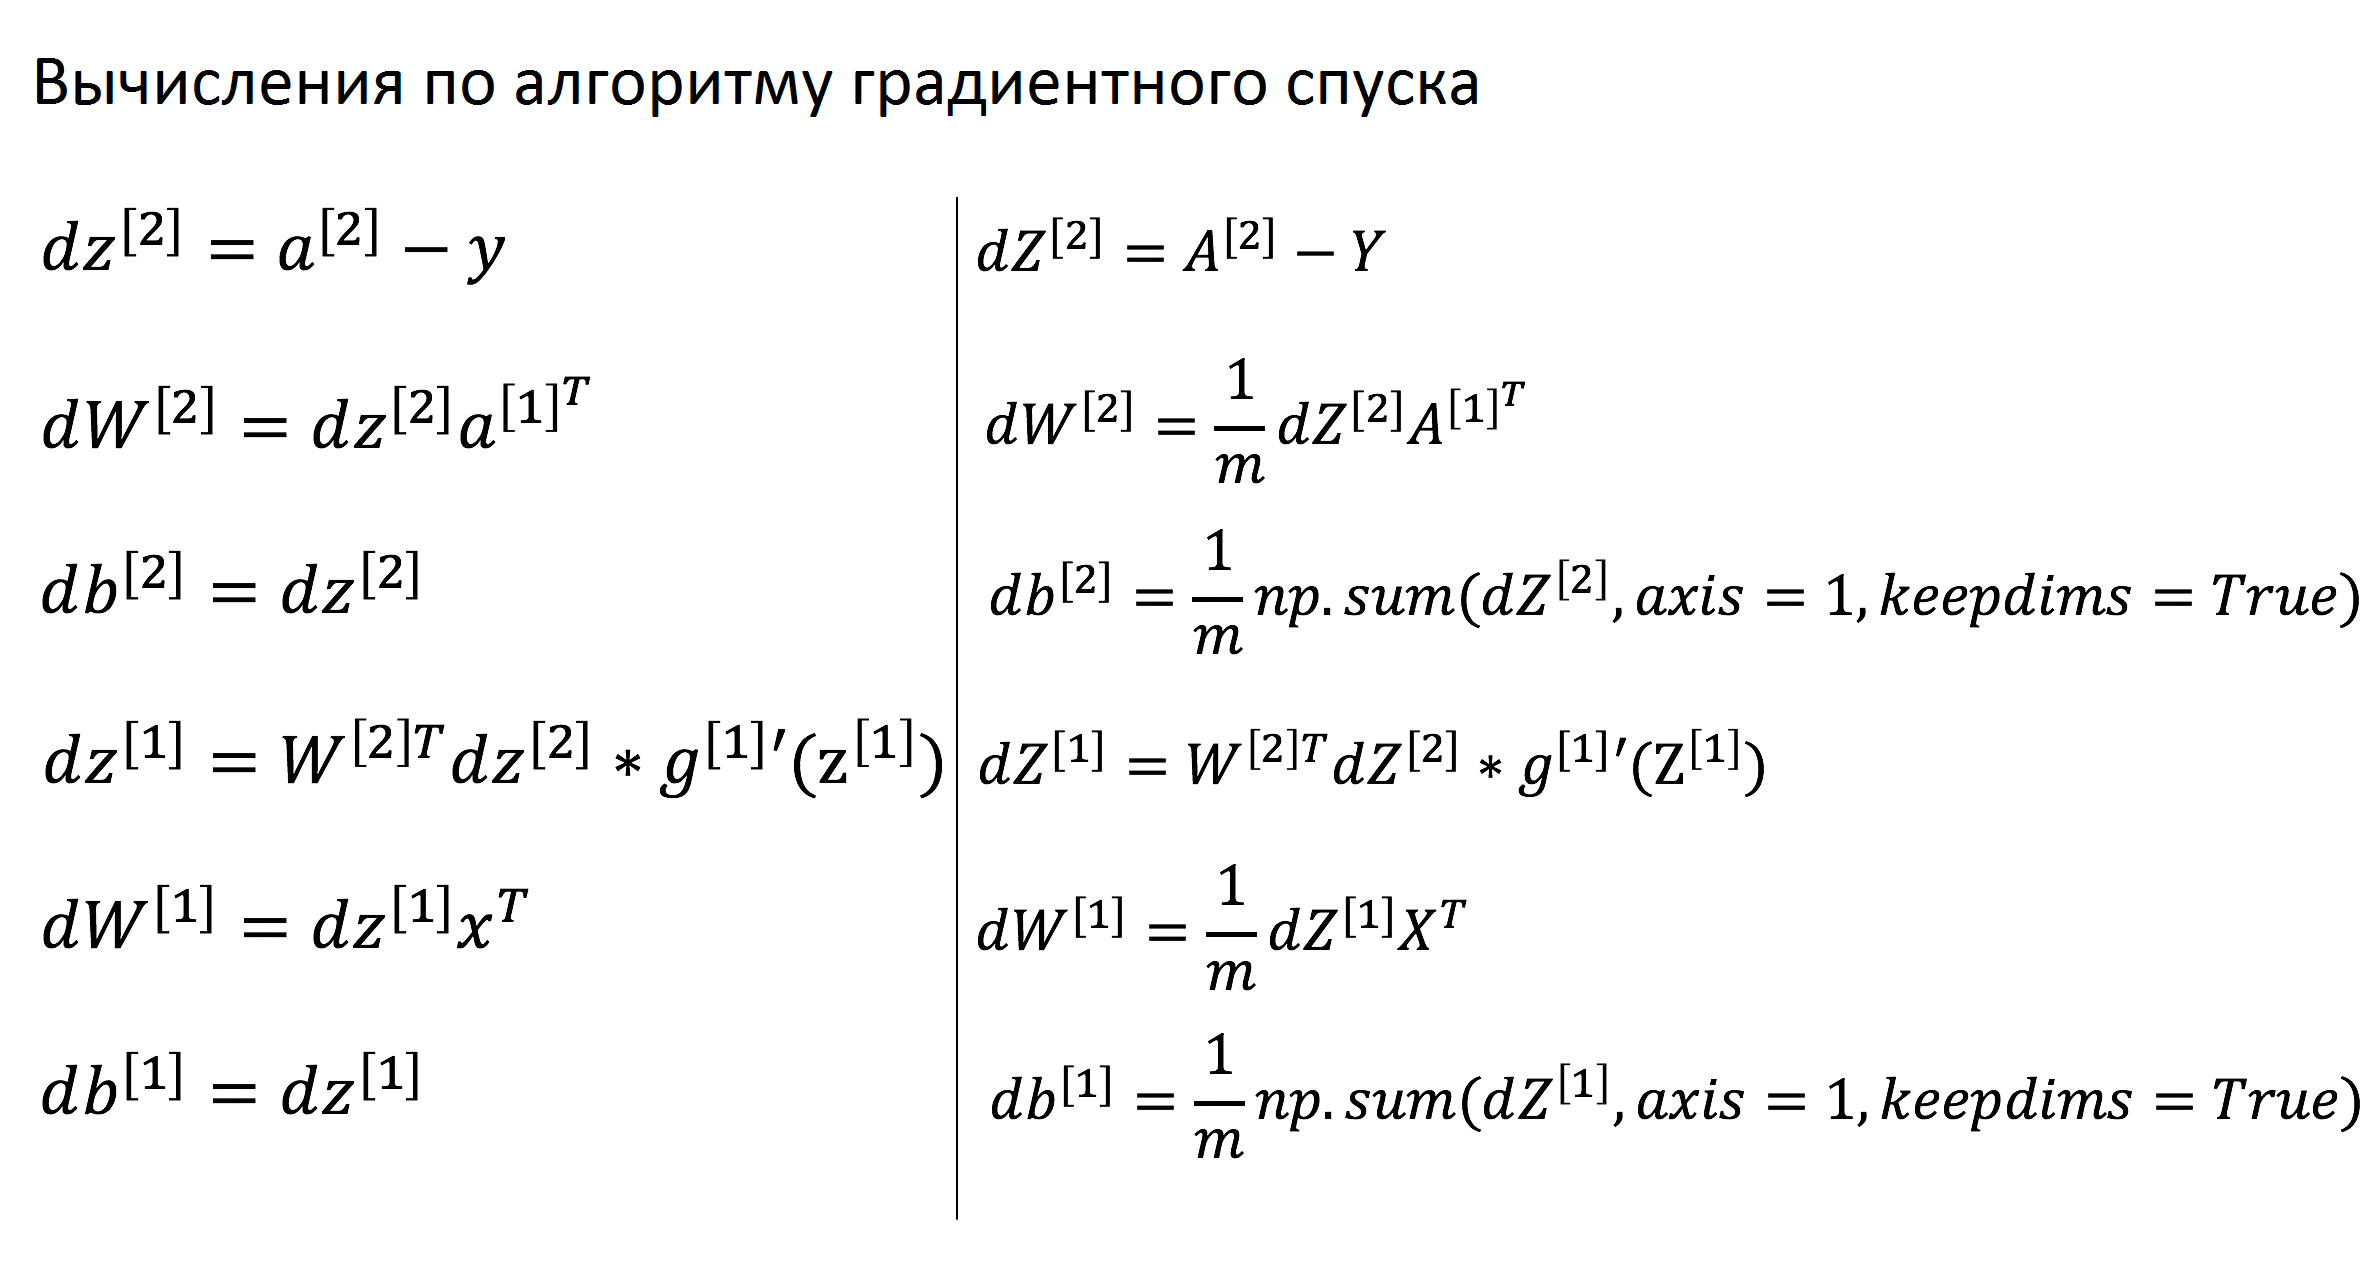

**Задание**: Используя сохраненные значения при прямом проходе, реализуйте обратное распространение ошибки `backward_propagation()`.

**Указания**:
Минимизация методом градиентного спуска обеспечивает подстройку весовых коэффициентов следующим образом:  

<img src="images/grad_summary.png" style="width:600px;height:300px;">

<!--
$\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } = \frac{1}{m} (a^{[2](i)} - y^{(i)})$

$\frac{\partial \mathcal{J} }{ \partial W_2 } = \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } a^{[1] (i) T} $

$\frac{\partial \mathcal{J} }{ \partial b_2 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)}}}$

$\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} } =  W_2^T \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } * ( 1 - a^{[1] (i) 2}) $

$\frac{\partial \mathcal{J} }{ \partial W_1 } = \frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} }  X^T $

$\frac{\partial \mathcal{J} _i }{ \partial b_1 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)}}}$

- Note that $*$ denotes elementwise multiplication.
- The notation you will use is common in deep learning coding:
    - dW1 = $\frac{\partial \mathcal{J} }{ \partial W_1 }$
    - db1 = $\frac{\partial \mathcal{J} }{ \partial b_1 }$
    - dW2 = $\frac{\partial \mathcal{J} }{ \partial W_2 }$
    - db2 = $\frac{\partial \mathcal{J} }{ \partial b_2 }$
    
!-->

- Совет:
    - Для вычисления dZ1 необходимо вычислить $g^{[1]'}(Z^{[1]})$. Т.к. $g^{[1]}(.)$ - тангенциальная функция активации, если $a = g^{[1]}(z)$, то $g^{[1]'}(z) = 1-a^2$. Так вы можете вычислить 
    $g^{[1]'}(Z^{[1]})$ используя `(1 - np.power(A1, 2))`.

**Перед тем, как реализовать алгоритм обратного распространения ошибки выведите размерности всех переменных (a,y,z,b,W)**

In [ ]:
# YOUR CODE HERE
W1 = parameters["W1"] 
W2 = parameters["W2"]
A1 = cache["A1"]
A2 = cache["A2"]
b1 = parameters["b1"]
b2 = parameters["b2"]
print ("W1 = "+ str(W1.shape))
print ("b1 = "+ str(b1.shape))
print ("W2 = "+ str(W2.shape))
print ("b2 = "+ str(b2.shape))
print ("A1 = "+ str(A1.shape))
print ("A2 = "+ str(A2.shape))

W1 = (4, 2)
b1 = (4, 1)
W2 = (1, 4)
b2 = (1, 1)
A1 = (4, 3)
A2 = (1, 3)


In [ ]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    
    # YOUR CODE HERE
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2= A2 - Y
    dW2 = 1 / m *(np.dot(dZ2,A1.T))
    db2 = 1 / m *(np.sum(dZ2,axis = 1,keepdims = True))
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1, 2))
    dW1 = 1 / m *(np.dot(dZ1,X.T))
    db1 = 1 / m *(np.sum(dZ1,axis = 1,keepdims = True))
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [ ]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


**Проверочные значения**:



<table style="width:80%">
  <tr>
    <td>**dW1**</td>
    <td> [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]] </td> 
  </tr>
  
  <tr>
    <td>**db1**</td>
    <td>  [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]] </td> 
  </tr>
  
  <tr>
    <td>**dW2**</td>
    <td> [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]] </td> 
  </tr>
  

  <tr>
    <td>**db2**</td>
    <td> [[-0.16655712]] </td> 
  </tr>
  
</table>  

**Задание**: Реализуйте коррекцию весов, используя (dW1, db1, dW2, db2) для обновления (W1, b1, W2, b2).

**Правило обновления весов градиентного спуска**: $ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$, где $\alpha$ - это параметр скорости обучения, а $\theta$ представляет обновляемый параметр.

Алгоритм градиентного спуска с оптимальной скорость обучения сходится, а с плохо подобранной - расходится.

<img src="images/sgd.gif" style="width:400;height:400;"> <img src="images/sgd_bad.gif" style="width:400;height:400;">



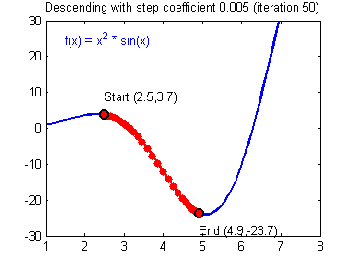

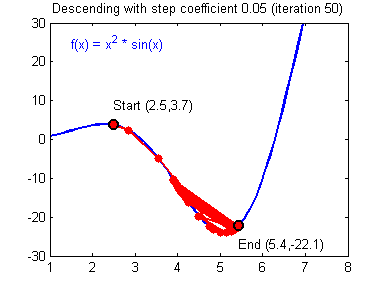

In [ ]:
def update_parameters(parameters, grads, learning_rate = 1.3):
    # YOUR CODE HERE
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [ ]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00645358  0.0195726 ]
 [-0.02418681  0.0404813 ]
 [-0.0165079  -0.02124813]
 [ 0.0105615  -0.06071134]]
b1 = [[-1.03476457e-06]
 [ 1.31192093e-05]
 [ 8.52012322e-07]
 [-3.25601514e-06]]
W2 = [[-0.01040905 -0.04500308  0.01770599  0.04772685]]
b2 = [[0.00010566]]


**Ожидаемые значения**:


<table style="width:80%">
  <tr>
    <td>**W1**</td>
    <td> [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]</td> 
  </tr>
  
  <tr>
    <td>**b1**</td>
    <td> [[ -1.02420756e-06]
 [  1.27373948e-05]
 [  8.32996807e-07]
 [ -3.20136836e-06]]</td> 
  </tr>
  
  <tr>
    <td>**W2**</td>
    <td> [[-0.01041081 -0.04463285  0.01758031  0.04747113]] </td> 
  </tr>
  

  <tr>
    <td>**b2**</td>
    <td> [[ 0.00010457]] </td> 
  </tr>
  
</table>  

### 4.4 - Построение модели нейронной сети nn_model() ####

**Задание**: Постройте нейросетевую модель в функции `nn_model()`, используя реализованные функции.

In [ ]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = initialize_parameters(n_x,n_h,n_y)
    # YOUR CODE HERE
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        A2, cache = forward_propagation(X,parameters)
        
        cost = compute_cost(A2, Y, parameters)
 
        grads = backward_propagation(parameters, cache, X, Y)
        
        parameters = update_parameters(parameters, grads)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Значение ошибки после %i итерации: %f" %(i, cost))

    return parameters

In [ ]:
X_assess, Y_assess = nn_model_test_case()
parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Значение ошибки после 0 итерации: 0.041960
Значение ошибки после 1000 итерации: 0.000246
Значение ошибки после 2000 итерации: 0.000124
Значение ошибки после 3000 итерации: 0.000083
Значение ошибки после 4000 итерации: 0.000063
Значение ошибки после 5000 итерации: 0.000050
Значение ошибки после 6000 итерации: 0.000042
Значение ошибки после 7000 итерации: 0.000036
Значение ошибки после 8000 итерации: 0.000031
Значение ошибки после 9000 итерации: 0.000028
W1 = [[-0.89892342  1.18654226]
 [-2.14804302  1.7077116 ]
 [-1.49944674 -1.2172068 ]
 [ 0.81075819 -1.65770151]]
b1 = [[ 0.19266216]
 [ 0.01644047]
 [-0.34386771]
 [-0.25403278]]
W2 = [[-2.93225764 -3.20800192  0.36373254  4.53353416]]
b2 = [[0.24703577]]


**Ожидаемые значения**:

<table style="width:90%">

<tr> 
    <td> 
        **cost after iteration 0**
    </td>
    <td> 
        0.692739
    </td>
</tr>

<tr> 
    <td> 
        <center> $\vdots$ </center>
    </td>
    <td> 
        <center> $\vdots$ </center>
    </td>
</tr>

  <tr>
    <td>**W1**</td>
    <td> [[-0.65848169  1.21866811]
 [-0.76204273  1.39377573]
 [ 0.5792005  -1.10397703]
 [ 0.76773391 -1.41477129]]</td> 
  </tr>
  
  <tr>
    <td>**b1**</td>
    <td> [[ 0.287592  ]
 [ 0.3511264 ]
 [-0.2431246 ]
 [-0.35772805]] </td> 
  </tr>
  
  <tr>
    <td>**W2**</td>
    <td> [[-2.45566237 -3.27042274  2.00784958  3.36773273]] </td> 
  </tr>
  

  <tr>
    <td>**b2**</td>
    <td> [[ 0.20459656]] </td> 
  </tr>
  
</table>  

### 4.5 Прогноз

**Задание**: Реализуйте функцию predict() для прогноза модели.
Используйте прямое распространение сигнала по сети.


In [ ]:
def predict(parameters, X):
    """
    Используя параметры обученной модели, предскажем класс для каждого примера в X
    
    Аргументы:
    parameters -- Словарь python хранит в себе параметры вашей модели 
    X -- входные данные размерности (n_x, m)
    
    Выход функции
    predictions -- Вектор с прогнозом вашей модели (красный: 0 / синий: 1)
    """
    
    # YOUR CODE HERE
    A2, cache = forward_propagation(X,parameters)
    predictions = (A2 > 0.5)
    
    return predictions

In [ ]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

assert round(np.mean(predictions),3)==0.667

predictions mean = 0.6666666666666666


Давайте запустим модель и посмотрим как она справится со всем набором данных. Запустите следующий код и протестируйте свою нейронную сеть с одим скрытым слоем, содержащим $n_h$ нейронов.

Значение ошибки после 0 итерации: 1.127380
Значение ошибки после 1000 итерации: 0.287285
Значение ошибки после 2000 итерации: 0.274639
Значение ошибки после 3000 итерации: 0.266623
Значение ошибки после 4000 итерации: 0.261789
Значение ошибки после 5000 итерации: 0.258468
Значение ошибки после 6000 итерации: 0.256027
Значение ошибки после 7000 итерации: 0.254146
Значение ошибки после 8000 итерации: 0.252645
Значение ошибки после 9000 итерации: 0.254207


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

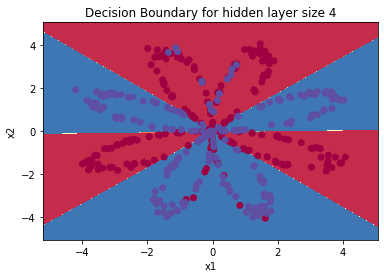

In [ ]:
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

**Ожидаемый выход**:

<table style="width:40%">
  <tr>
    <td>**Cost after iteration 9000**</td>
    <td> 0.218607 </td> 
  </tr>
  
</table>


In [ ]:
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 91%


**Expected Output**: 

<table style="width:15%">
  <tr>
    <td>**Accuracy**</td>
    <td> 90% </td> 
  </tr>
</table>

Точность значительно увеличилась по сравнению с логистической регрессией, давайте теперь попробуем различные варианты реализации скрытого слоя.

### 4.6 - Изменение количество нейронов на скрытом слое ###

Запустите следующий код. Проанализируйте влияние размерности скрытого слоя на результат классификации.

Точность для 1 скрытого слоя: 61.5 %
Точность для 2 скрытого слоя: 70.5 %
Точность для 3 скрытого слоя: 66.25 %
Точность для 4 скрытого слоя: 90.75 %
Точность для 5 скрытого слоя: 91.0 %
Точность для 20 скрытого слоя: 91.5 %
Точность для 50 скрытого слоя: 90.75 %


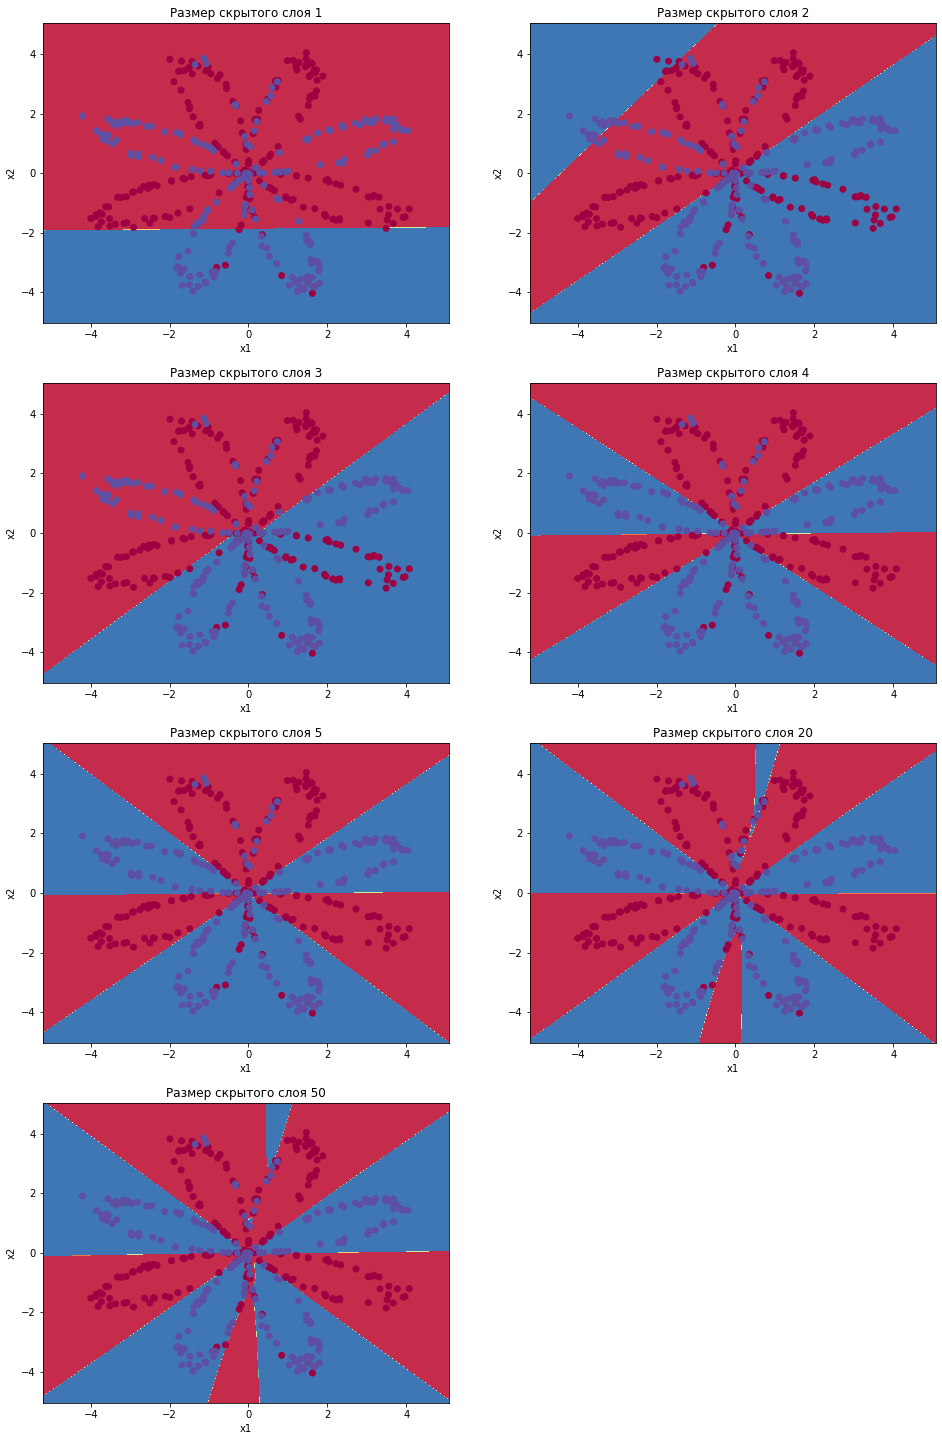

In [ ]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Размер скрытого слоя %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Точность для {} скрытого слоя: {} %".format(n_h, accuracy))

**Объяснения**:
- Чем больше нейронов на скрытом слое, тем более точно модель описывает обучающую выборку, пока в какой-то момент максимально большая модель не переучится. 
- Наиболее удачной будет модель с 5-ю нейронами на скрытом слое. При этом значении переобучение еще не происходит.
- Позже вы познакомитесь с понятием "регуляризация". Регуляризация позволяет использовать модели с большим количеством нейронов на скрытом слое без переобучения сети. 

**Вопросы**:

- Что произойдет если изменить функцию активации с tanh на sigmoid или на ReLU?
- Проанализируйте на что влияет изменение learning_rate.
- Выберите датасет из раздела 5, согласно своему варианту. 

Алгоритм градиентного спуска с оптимальной скорость обучения сходится, а с плохо подобранной - расходится, в моем слуаче уменьшалась accuracy

YOUR ANSWER HERE

## 5) Самостоятельная работа.
Выберите датасет согласно своему варианту. Обучите нейронную сеть и выполните классификацию. Постройте график ошибки на обучении, подберите наилучшую скорость обучения и количество эпох обучения. Сделайте выводы. Испробуте другие варианты архитектуры и функций активации на платформе http://playground.tensorflow.org/

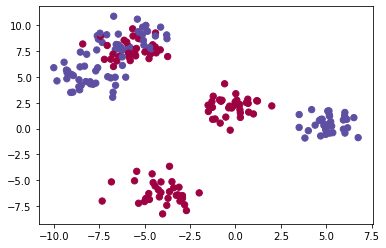

In [ ]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,             # 1 вариант
            "noisy_moons": noisy_moons,                 # 2 вариант
            "blobs": blobs,                             # 3 вариант
            "gaussian_quantiles": gaussian_quantiles}   # 4 вариант

### BEGIN SOLUTION
dataset = "blobs"
### END SOLUTION

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

Значение ошибки после 0 итерации: 1.664397
Значение ошибки после 1000 итерации: 0.323840
Значение ошибки после 2000 итерации: 0.323118
Значение ошибки после 3000 итерации: 0.322905
Значение ошибки после 4000 итерации: 0.322807
Значение ошибки после 5000 итерации: 0.322754
Значение ошибки после 6000 итерации: 0.322721
Значение ошибки после 7000 итерации: 0.322698
Значение ошибки после 8000 итерации: 0.322681
Значение ошибки после 9000 итерации: 0.322669


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

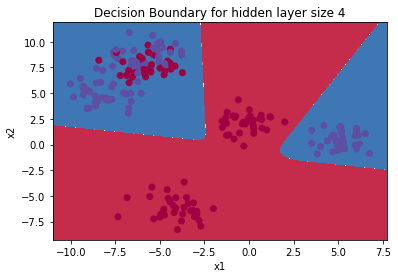

In [ ]:
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [ ]:
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 83%


YOUR ANSWER HERE